# Bank Personal Loan Modelling - Machine Learning 

## Dataset Information:

Name: Bank_Personal_Loan_Modelling.xlsx

Domain: Banking

Aim: 
1. To classify in order to predict the likelihood of a liability bank customer for buying personal loan.
2. To sell more Personal Loan products to Bank customers.
3. To devise campaigns to better target marketing to increase the success ratio with a minimal budget.
4. To identify the potential customers who have a higher probability of purchasing the loan.
5. Increase the success ratio of advertisement campaign while at the same time reduce the cost of the campaign.

About the Dataset:

The dataset is related to the Banking sector where a bank (namely Thera bank) having information of about 5000 liability customers wants to benefit from the information to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). The data includes customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan) which saw a healthy conversion rate of 9.6% i.e., 480 out of 5000 liablility customers opted for personal loans.

Now, the retail department of the bank wants to build a machine learning model in order devise campaigns with better target marketing to increase the success ratio with minimal budget. The model should help them identify the potential customers who have a higher probability of purchasing the loan which will eventually increase their success ratio at the reduced campaign cost.

There are total 14 attributes in the dataset and in the context of the given problem, the target (or dependent) attribute is "Personal Loan" whereas the remaining are independent attributes.

## Attribute Information:

1. ID : Customer ID
2. Age : Customer's age in completed years
3. Experience : #years of professional experience
4. Income : Annual income of the customer 
5. ZIP Code : Home Address ZIP code.
6. Family : Family size of the customer
7. CCAvg : Avg. spending on credit cards per month 
8. Education : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
9. Mortgage : Value of house mortgage if any. 
10. Securities Account : Does the customer have a securities account with the bank?
11. CD Account : Does the customer have a certificate of deposit (CD) account with the bank?
12. Online : Does the customer use internet banking facilities?
13. Credit card : Does the customer use a credit card issued by UniversalBank?
14. Personal Loan : Did this customer accept the personal loan offered in the last campaign? (Target Attribute)

## Learning Outcomes:
1. Exploratory Data Analysis
2. Preparing the data to train a model
3. Training and making predictions using a classification model
4. Model evaluation

# 1. Importing necessory libraries and the dataset

In [43]:
# Importing the necessary libraries
import numpy as np #importing numpy library
import pandas as pd  # To read the dataset as dataframe
import seaborn as sns # For Data Visualization 
import matplotlib.pyplot as plt # Necessary module for plotting purpose
%matplotlib inline

In [44]:
#sklearn modules required for the model building and comparison of various algorithms part
from sklearn.model_selection import train_test_split # For train-test split
# getting methods for confusion matrix, F1 score, Accuracy Score
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression # For logistic Regression
from sklearn.naive_bayes import GaussianNB # For Naive Bayes classifier
from sklearn.neighbors import KNeighborsClassifier # For K-NN Classifier
from sklearn.svm import SVC # For support vector machine based classifier

In [45]:
df_main=pd.read_csv("Bank_Personal_Loan_Modelling.csv")

# 2. Analyzing the data distribution of each attribute and listing the relevant findings

## 1. Check if you need to clean the data for any of the variables
## 2. EDA: Study the data distribution in each attribute and target variable, share your findings.
In this section, we will use Exploratory Data Analysis (EDA) tools and Applied Statistics concepts to verify the significance of each independent attribute towards predicting probability of a cutomer for buying the personal loan.

In [46]:
df_main.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [47]:
# For our convinience, let us make target attribute "Personal Loan" as the last column of our dataframe.
#Personal Loan column is actually the feature of our ML Model.
# Creating copy of original dataframe 
df = df_main.copy()
df.drop('Personal Loan',axis=1,inplace=True)
df['Personal Loan'] = df_main['Personal Loan']

In [48]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


In [49]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,1,1,0


In [50]:
# Shape of dataframe
df.shape

(5000, 14)

Observation: 
 There are 5000 rows and 14 columns in this dataset.

In [51]:
# List the information about each column such as non null count, datatype etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
Personal Loan         5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Observation: 
1. There are no null values in any of the features. 
2. Another peculiarity of the dataset is all the columns are numerical(data is already encoded).
3. Numeric data columns (Interval or Ratio) are: Age, Experience, Income, Mortgage and CCAvg
4. Ordinal Categorical columns are: Family and Education
5. Nominal Categorical columns are: ID, ZIP Code, Securities Account, CD Account, Online, CreditCard, Personal Loan

In [52]:
# Printing the column (attribute) names
for name in df.columns:
    print(name)

ID
Age
Experience
Income
ZIP Code
Family
CCAvg
Education
Mortgage
Securities Account
CD Account
Online
CreditCard
Personal Loan


In [53]:
#datatypes of the column attributes
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
Personal Loan           int64
dtype: object

Observation: Data type of column 'CCAvg' is float64, whereas remaining attributes are of type int64

# 3. EDA: Study the data distribution in each attribute and target variable, share your findings.


In [54]:
# check the dataset for missing values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Personal Loan         0
dtype: int64

Observation: There are no missing values in any of the column attributes.

In [55]:
# Number of unique datatypes and their value count
df.dtypes.value_counts()

int64      13
float64     1
dtype: int64

In [56]:
# gives an idea about distribution of each attribute
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


Observations:

1. 'Experience' column shows presence of negative entries (min=-3) which is wrong and needs to be handled appropriately.
2. Remaining numeric columns such as Age, Income, CCAvg, Mortgage seem to be fine and no data cleaning is required
3. The customer ages are in the range of 23 to 67 with average age as 45. Quarter of the customer population is below 35.
4. Columns with binary information such as Securities Account, CD Account, Online, CreditCard, Personal Loan are also clean.

In [57]:
# negative entries in the Experience column
df[df['Experience']<0].Experience.count()

52

Observation: There are 52 negative entries in the Experience column.

In [58]:
# Let us see how many unique negative entries are there?
df[df['Experience']<0].Experience.value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

Observation: There there unique negative entries -1,-2 and -3 in the experience column.

In [59]:
df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.016972,-0.006909,-0.002528,0.017028,-0.024801
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.000436,0.008043,0.013702,0.007681,-0.007726
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.001232,0.010353,0.013898,0.008967,-0.007413
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,-0.002616,0.169738,0.014206,-0.002385,0.502462
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.004704,0.019972,0.016990,0.007691,0.000107
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.019994,0.014110,0.010354,0.011588,0.061367
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.015086,0.136534,-0.003611,-0.006689,0.366889
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,-0.010812,0.013934,-0.015004,-0.011014,0.136722
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,-0.005411,0.089311,-0.005995,-0.007231,0.142095
Securities Account,-0.016972,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,1.000000,0.317034,0.012627,-0.015028,0.021954


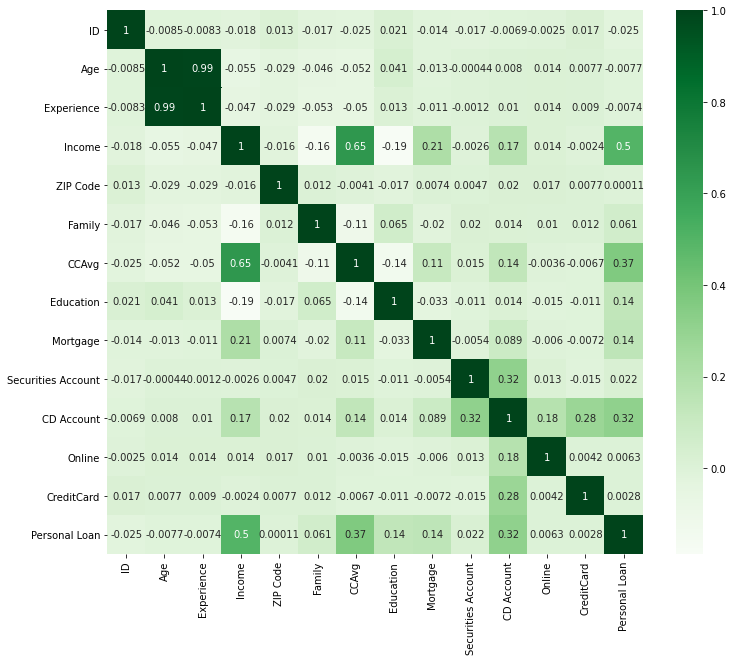

In [60]:
# Above table represented more elegently using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True, cmap="Greens")

Observation:
1. Experience attribute is highly correlated with the Age attribute so we will use this for our data cleaning purpose.
2. Since Age and Experience are highly correlated (0.99), so one can drop the experience column. 

In [61]:
# Find the unique ages which have -1, -2 and -3 entries in the Experience column
df[df['Experience'] == -1]['Age'].value_counts()

25    17
24     6
23     6
29     3
26     1
Name: Age, dtype: int64

In [62]:
df[df['Experience'] == -2]['Age'].value_counts()

24    9
23    4
28    1
25    1
Name: Age, dtype: int64

In [63]:
df[df['Experience'] == -3]['Age'].value_counts()

23    2
24    2
Name: Age, dtype: int64

In [64]:
# We will find the mean of positive experience values for above ages
# use it to replace all the experience entries 
# having -1 value
l1 = df[df['Experience'] == -1]['Age'].value_counts().index.tolist()
ind_1 = df[df['Experience'] == -1]['Experience'].index.tolist()
for i in ind_1:
    df.loc[i,'Experience'] = df[(df['Age'].isin(l1)) & (df.Experience > 0)].Experience.mean()

In [65]:
# We will find the mean of positive experience values for above ages
# use it to replace all the experience entries 
# having -2 value
l2 = df[df['Experience'] == -2]['Age'].value_counts().index.tolist()
ind_2 = df[df['Experience'] == -2]['Experience'].index.tolist()
for i in ind_2:
    df.loc[i,'Experience'] = df[(df['Age'].isin(l2)) & (df.Experience > 0)].Experience.mean()

In [66]:
# We will find the mean of positive experience values for above ages
# use it to replace all the experience entries 
# having -3 value
l3 = df[df['Experience'] == -3]['Age'].value_counts().index.tolist()
ind_3 = df[df['Experience'] == -3]['Experience'].index.tolist()
for i in ind_3:
    df.loc[i,'Experience'] = df[(df['Age'].isin(l3)) & (df.Experience > 0)].Experience.mean()

In [67]:
df.Experience.describe()

count    5000.000000
mean       20.149833
std        11.391004
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

Observation:  The data has now been cleaned and can be worked with. All the values are positive.

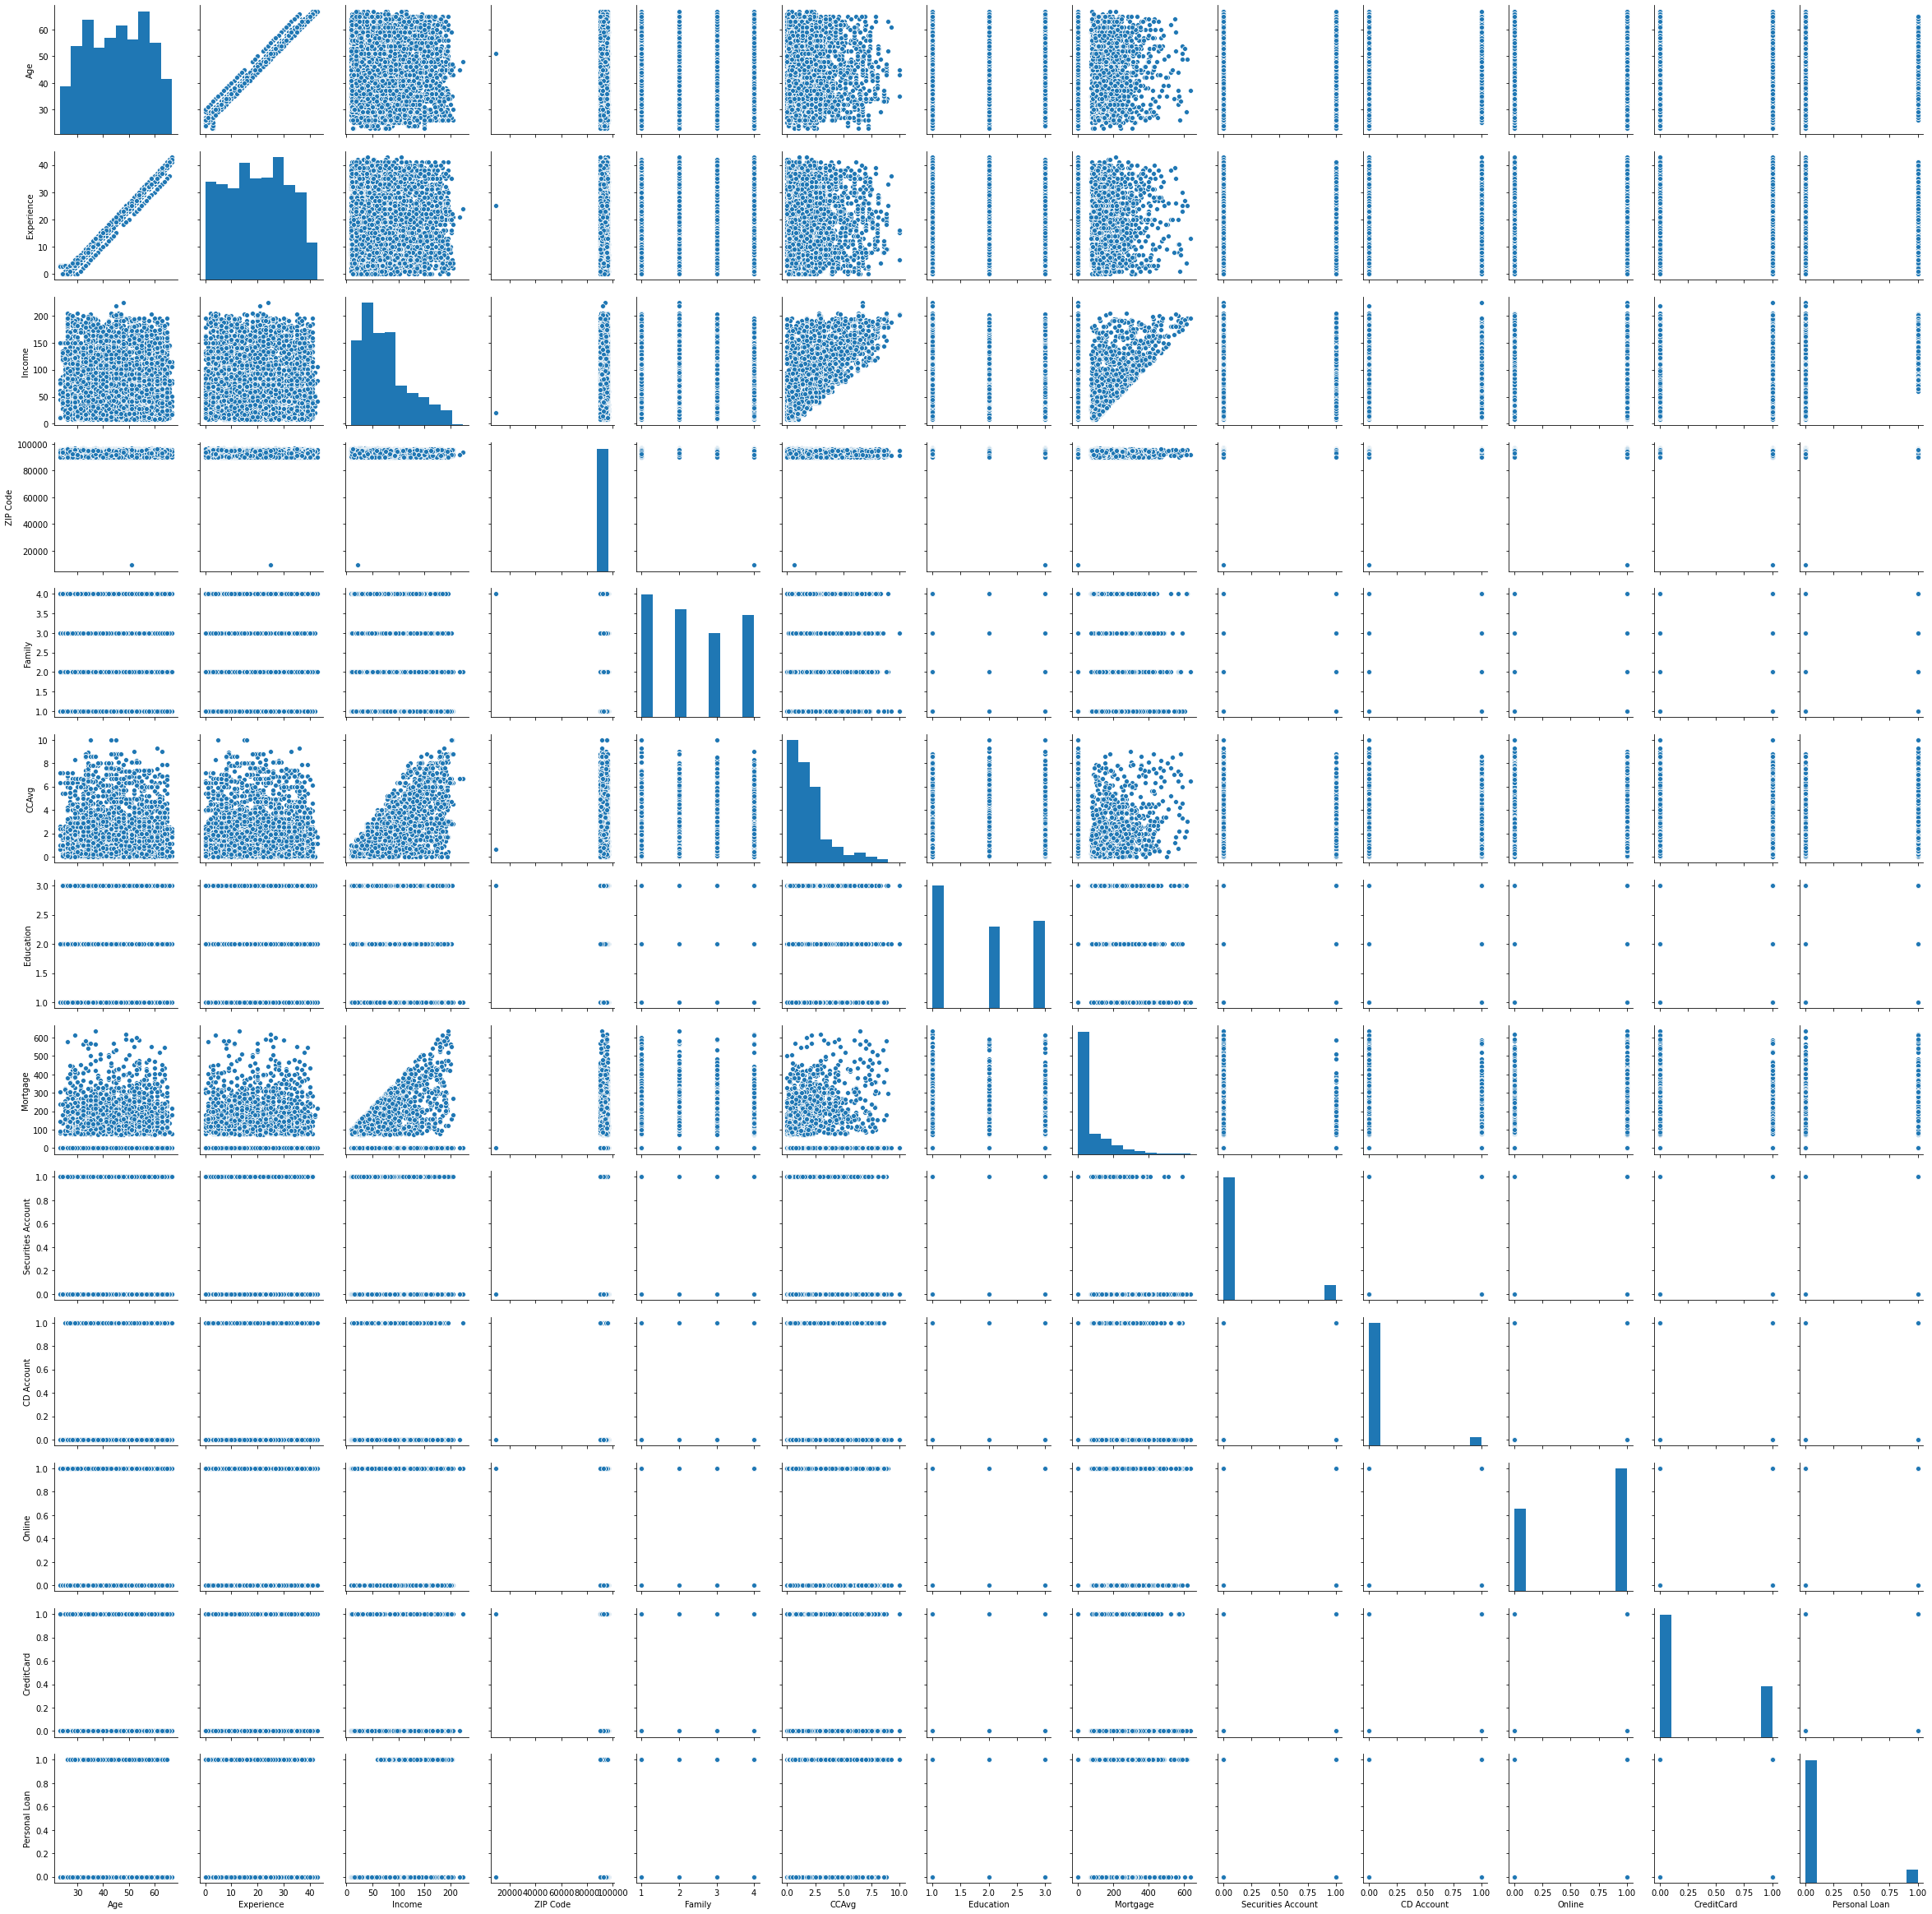

In [68]:
sns.pairplot(df.iloc[:,1:])

Observation:
1. Age and Experience have a very strong Linear Relationship between them. 
2. CCAvg and Mortgage values are lower than the income.

In [69]:
# Lets get the categorical features. We consider the features which are having less than 25 values as categorical.
cat_features = [feature for feature in df.columns if df[feature].nunique()<25]
print('Categorical Features : ', cat_features)
df[cat_features].head()

Categorical Features :  ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Personal Loan']


,Family,Education,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,4,1,1,0,0,0,0
1,3,1,1,0,0,0,0
2,1,1,0,0,0,0,0
3,1,2,0,0,0,0,0
4,4,2,0,0,0,1,0


In [70]:
# Continues features
cont_features = [feature for feature in df.columns if feature not in cat_features + ['ID']]
cont_features

['Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage']

Let us visualize the distribution of each of the categorical features

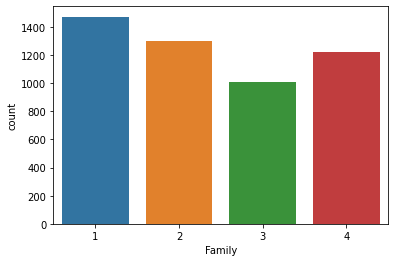

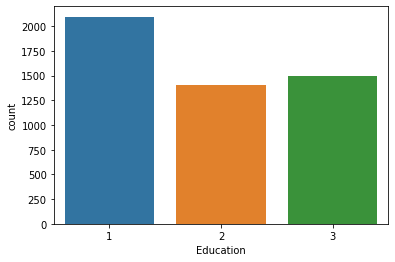

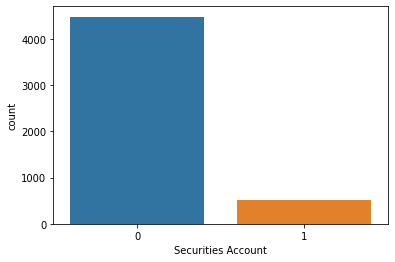

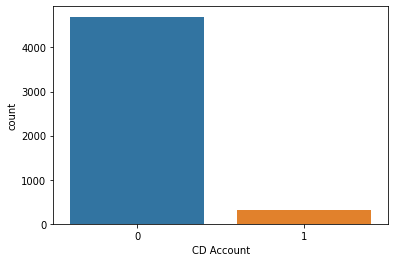

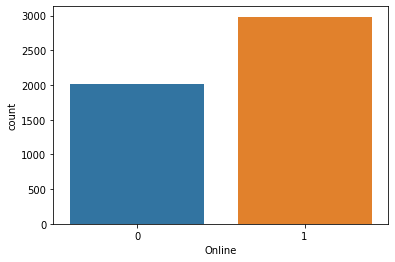

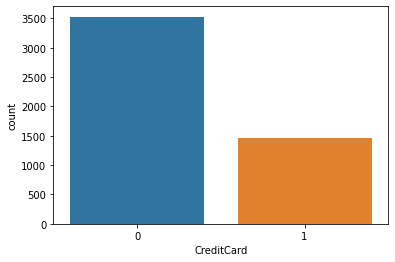

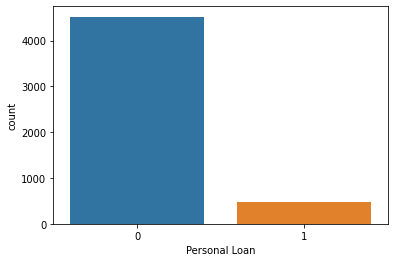

In [71]:
for feature in cat_features:
    sns.countplot(df[feature])
    plt.show()

Observations:
1. The number of customers who took the loan last year(our target variable) were very less (<500) compared to the set of customers who haven't taken the loan(>4500). 
2. Very few customers have Securities account or CD account. (< 500)
3. Majority of the customers do not own Credit Cards as well. (>3500)

Let us check the distribution of the continuous features now.

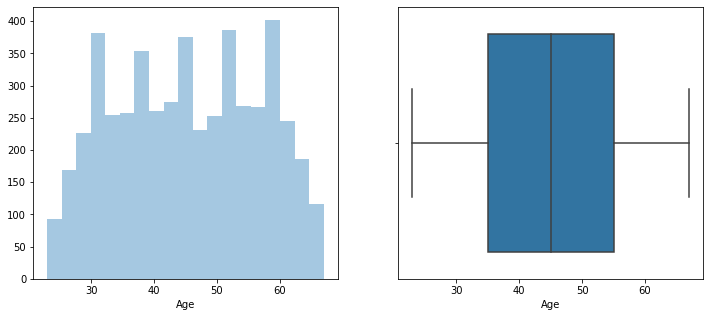

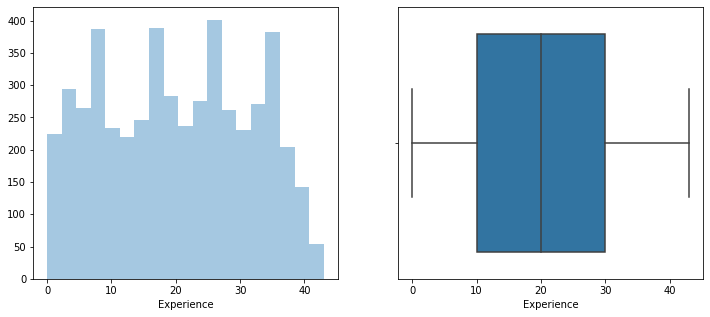

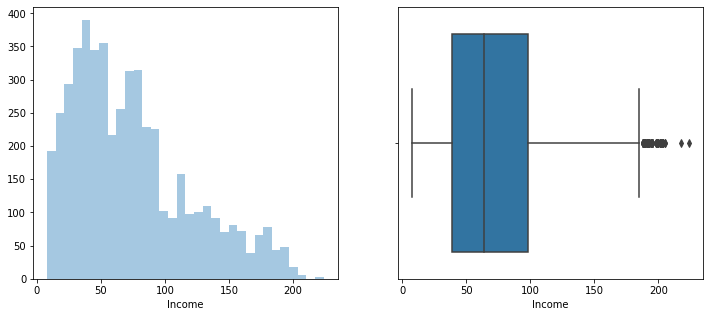

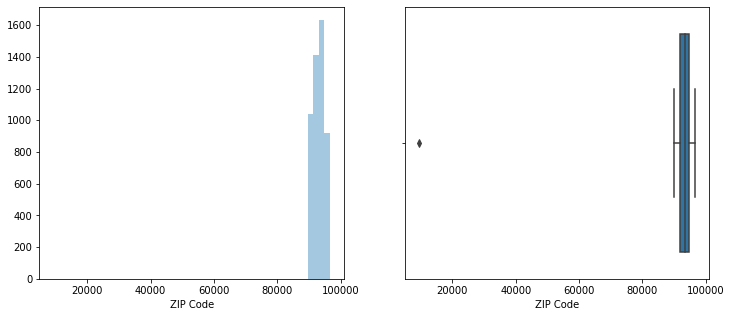

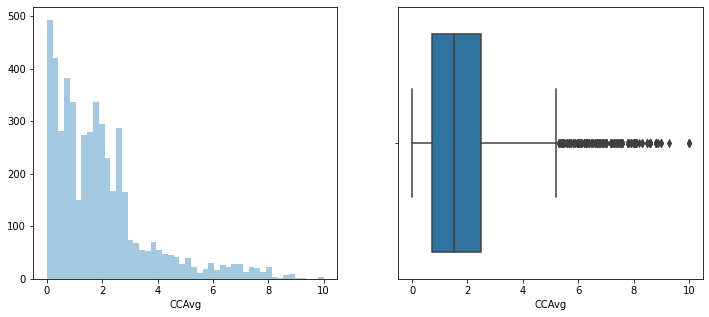

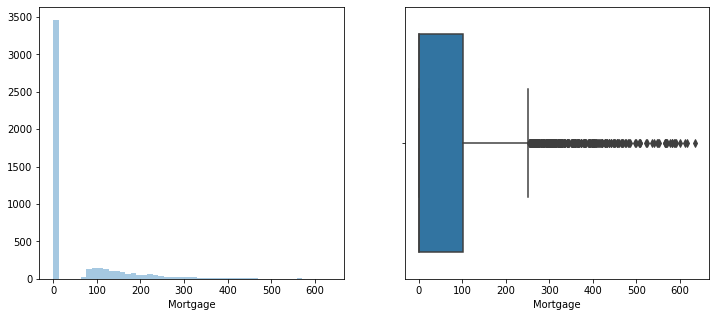

In [72]:
for feature in cont_features:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
    sns.distplot(df[feature], kde=False, ax=ax1)
    sns.boxplot(df[feature], ax=ax2)
    plt.show()

Observations:
1. Income and CCAvg are positively skewed distribution with some outliers towards the higher end. Chances for it being incorrectly entered or measured is less, as there are very few people with outstanding salaries.
2. Mortgage is also having some outliers towards the higher end. It can be seen from describe function that 75% of customers had Mortgage value less than 101 indicating the high peak on the distribution plot, even though maximum was 635. Similar to above, chances for it being incorrectly entered or measured is less.
3. Majority of the people are aged between 35 to 55 with experience between 10 to 30. (Relationship between the two is evident)


Let us check how the CCAvg varies with Income

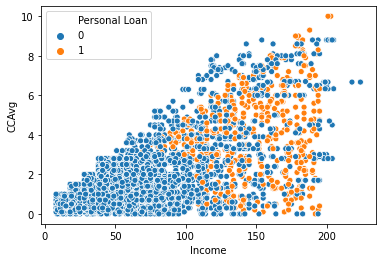

In [73]:
sns.scatterplot(x='Income',y='CCAvg',hue='Personal Loan', data=df)

Observations:
1. People having more income tend to spend more on their credit card.
2. From the 1st figure it is clear that people with higher income opted for the Personal Loan.
3. Also, people don't tend to spend more than their income on the credit card. (Scatterplot triangular)


Let us now see how the income varies with the Education and Experience

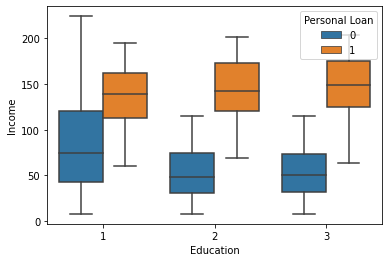

In [75]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=df)

Observations:
1. People with lower education are earning more income.  
2. Income doesn't vary based on one's Experience. 
3. Personal loan neither strongly depend on Education nor Experience.
4. Personal loan is dependent on the income though. 
5. It is evident from the higher band boxplots for Personal Loan, people with higher income tend to opt for Personal Loan.


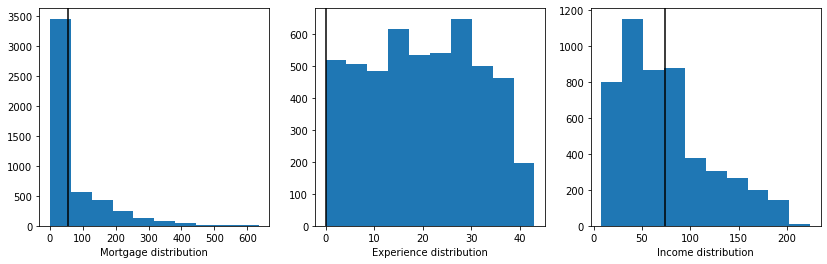

In [77]:
fig, [ax0, ax1, ax2] = plt.subplots(1,3, figsize = (14,4))

ax0.hist(df.Mortgage)
ax0.set_xlabel('Mortgage distribution')
ax0.axvline(df.Mortgage.mean(), color = "black")

ax1.hist(df.Experience)
ax1.set_xlabel('Experience distribution')
ax1.axvline(0, color = "black");

ax2.hist(df.Income)
ax2.set_xlabel('Income distribution')
ax2.axvline(df.Income.mean(), color = "black");

The data looks clean. 

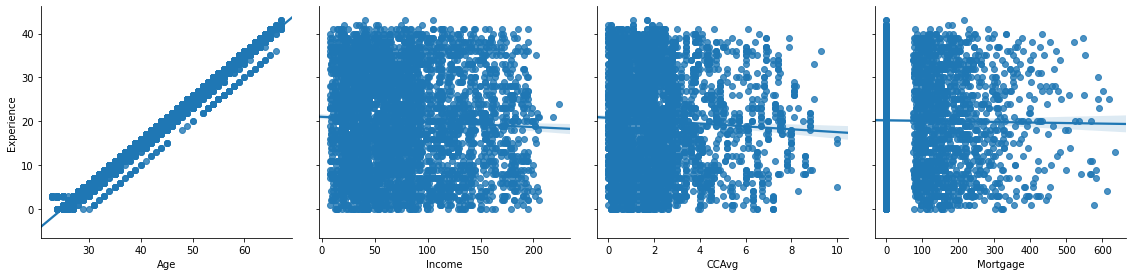

In [78]:
ncol = ['Age', 'Income','CCAvg', 'Mortgage']
grid = sns.PairGrid(df, y_vars = 'Experience', x_vars = ncol, height = 4)
grid.map(sns.regplot);

Observation: Age has a very strong association with 'Experience

Analyzing the Age attribute

Text(0.5, 1.0, 'Age Distribution')

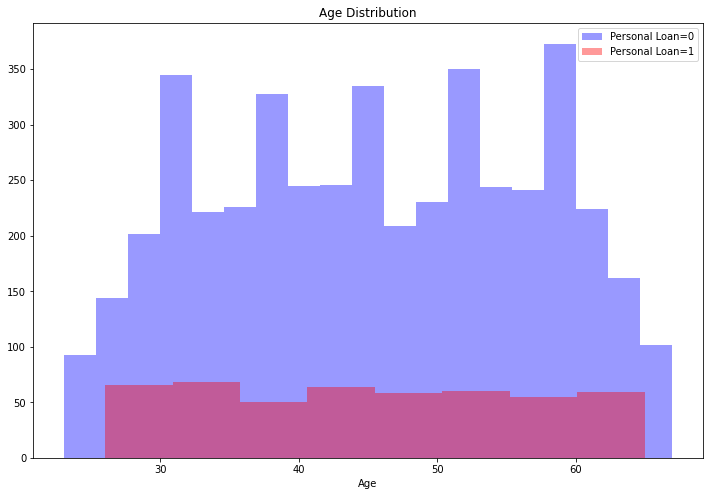

In [79]:
plt.figure(figsize=(12,8))
sns.distplot(df[df['Personal Loan'] == 0]['Age'],kde=False, color='b', label='Personal Loan=0')
sns.distplot(df[df['Personal Loan'] == 1]['Age'],kde=False, color='r',label='Personal Loan=1')
plt.legend()
plt.title("Age Distribution")

Analyzing the Experience attribute

Text(0.5, 1.0, 'Experience Distribution')

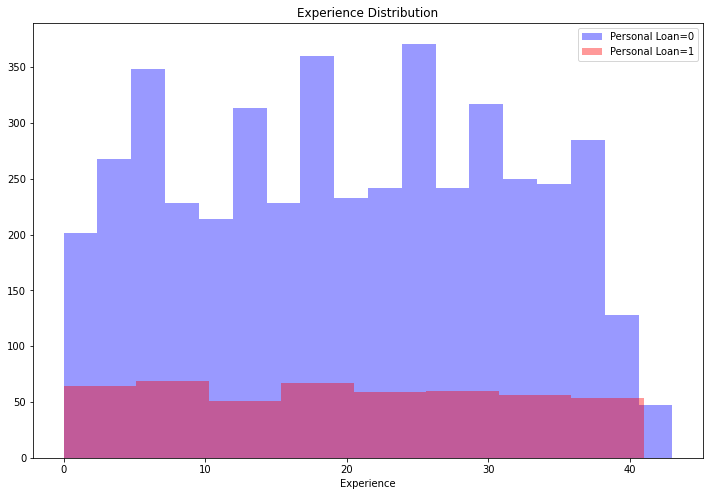

In [80]:
plt.figure(figsize=(12,8))
sns.distplot(df[df['Personal Loan'] == 0]['Experience'],kde=False, color='b', label='Personal Loan=0')
sns.distplot(df[df['Personal Loan'] == 1]['Experience'],kde=False, color='r',label='Personal Loan=1')
plt.legend()
plt.title("Experience Distribution")

Analyzing the Income attribute

Text(0.5, 1.0, 'Income Distribution')

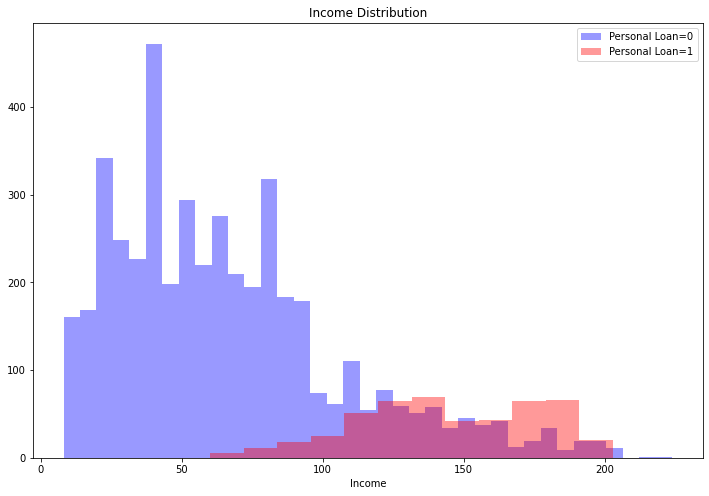

In [81]:
plt.figure(figsize=(12,8))
sns.distplot(df[df['Personal Loan'] == 0]['Income'],kde=False, color='b', label='Personal Loan=0')
sns.distplot(df[df['Personal Loan'] == 1]['Income'],kde=False, color='r',label='Personal Loan=1')
plt.legend()
plt.title("Income Distribution")

Analyzing the Family attribute

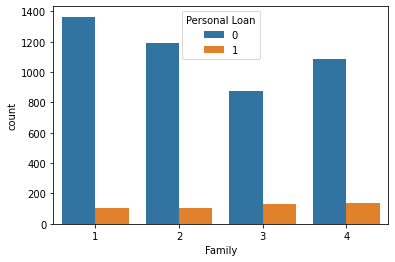

In [82]:
# Since it is a ordinal categorical variable, we will use countplot
sns.countplot(x='Family',hue='Personal Loan',data=df)

Analyzing the CCAvg attribute



Text(0.5, 1.0, 'CCAvg Distribution')

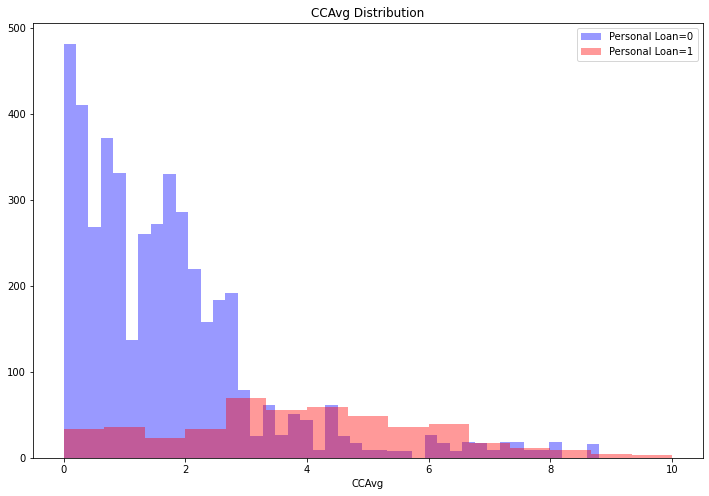

In [83]:
plt.figure(figsize=(12,8))
sns.distplot(df[df['Personal Loan'] == 0]['CCAvg'],kde=False, color='b', label='Personal Loan=0')
sns.distplot(df[df['Personal Loan'] == 1]['CCAvg'],kde=False, color='r',label='Personal Loan=1')
plt.legend()
plt.title("CCAvg Distribution")

Analyzing the Education attribute



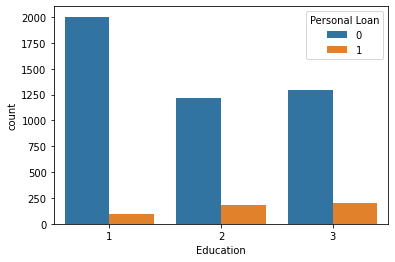

In [84]:
# Since Education is an ordinal categorical variable, we will use countplot
sns.countplot(df['Education'],hue=df['Personal Loan'])

Analyzing the Mortgage attribute



Text(0.5, 1.0, 'Mortgage Distribution')

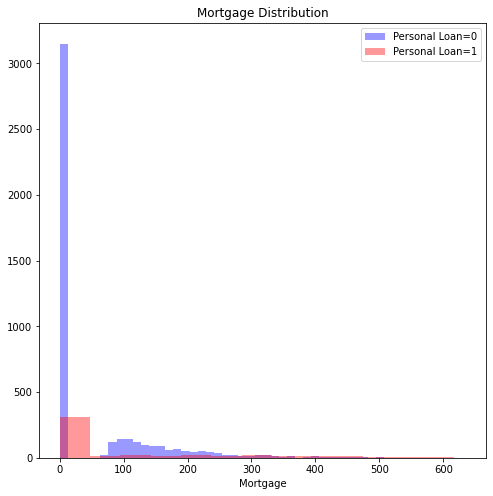

In [85]:
plt.figure(figsize=(8,8))
sns.distplot(df[df['Personal Loan'] == 0]['Mortgage'],kde=False, color='b', label='Personal Loan=0')
sns.distplot(df[df['Personal Loan'] == 1]['Mortgage'],kde=False, color='r',label='Personal Loan=1')
plt.legend()
plt.title("Mortgage Distribution")

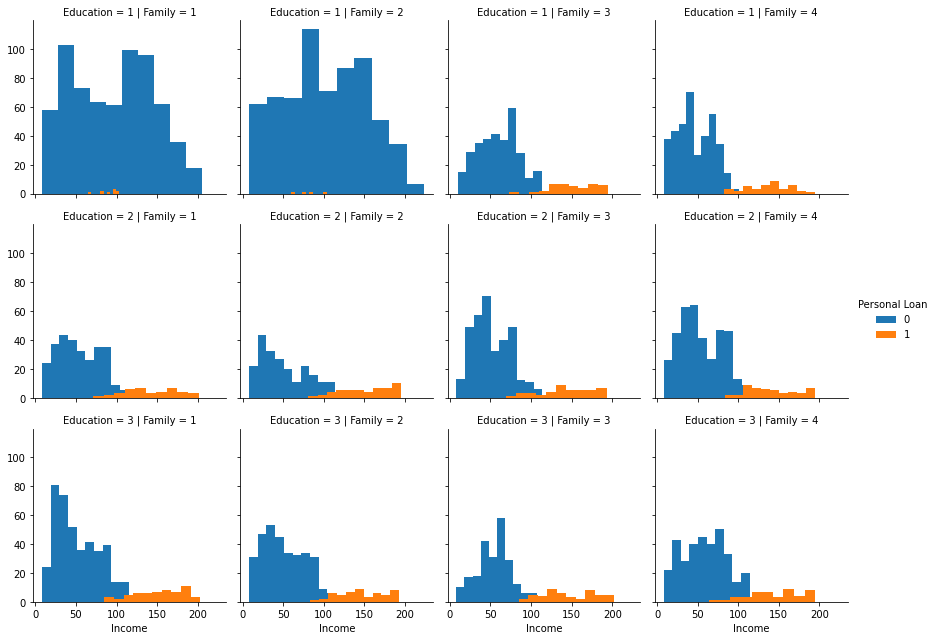

In [86]:
sns.FacetGrid(data=df,row='Education',col='Family',hue='Personal Loan').map(plt.hist,'Income').add_legend()

In [87]:
(df['Mortgage']==0).sum()

3462

In [88]:
(df['CCAvg']==0).sum()

106

In [89]:
(df['Family']).value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [90]:
(df['Education']).value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [91]:
(df['Securities Account']).value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [92]:
(df['CD Account']).value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [93]:
(df['CreditCard']).value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [94]:
(df['Online']).value_counts()

1    2984
0    2016
Name: Online, dtype: int64

Observation:I
rrespective of their income, undergraduate customers with 1 or 2 family members generally do not opt for personal loans.

# 4. Apply necessary transformations for the feature variables

In [95]:
# Since target attribute is binary in nature, let us see count for each class
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [96]:
# Converting above target class distribution as dataframe
df_target = df['Personal Loan'].value_counts()
df_target = pd.DataFrame({'class':df_target.index, 'count':df_target.values})

In [97]:
df_target

,class,count
0,0,4520
1,1,480


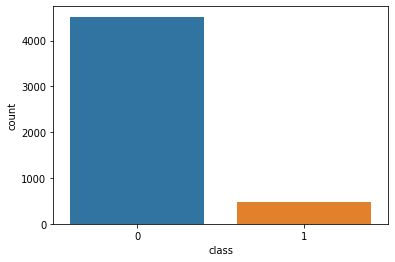

In [98]:
# barplot for target column distribution
sns.barplot(x='class',y = 'count',data=df_target);

In [99]:
# Let us add the percentage column to the dataframe.
df_target['Percentage'] = df_target['count']/df_target['count'].sum()*100
df_target

,class,count,Percentage
0,0,4520,90.4
1,1,480,9.6


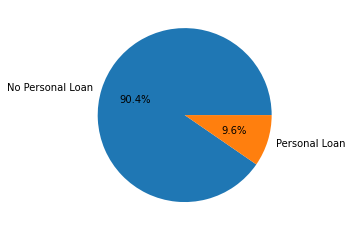

In [100]:
# Let us plot the Pie Plot
plt.pie(df_target['Percentage'],labels=['No Personal Loan','Personal Loan'],autopct= '%1.1f%%');


# 5. Normalise your data and split the data into training and test set in the ratio of 70:30 respectively

In [101]:
# We will drop the Age, ID columns from training as well as test dataset
X = df.iloc[:,2:-1]
y = df['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 7 )

# 6. Use the Logistic Regression model to predict the likelihood of a customer buying personal loans

Logistic Regression

In [102]:
# create model using constructor
LogRegModel = LogisticRegression()
# fit the model to training set
LogRegModel.fit(X_train,y_train)
# Predict the test data to get y_pred
y_pred = LogRegModel.predict(X_test)
# get accuracy of model
lr_acc_score = accuracy_score(y_test,y_pred)
# get F1-score of model
lr_f1_score = f1_score(y_test,y_pred) 
# get the confusion matrix
lr_confmat = confusion_matrix(y_test,y_pred)
# get the classification report
lr_classrep = classification_report(y_test,y_pred)


C:\Users\Unnati\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# 7. Print all the metrics related for evaluating the model performance

In [103]:
print("The accuracy of the model is {} %".format(lr_acc_score*100))
print("The f1-score of the model is {} %".format(lr_f1_score*100))
print("The confusion matrix for logistic regression is: \n",lr_confmat)
print("Detailed classification report for logistic regression is: \n",lr_classrep)

The accuracy of the model is 91.8 %
The f1-score of the model is 40.57971014492754 %
The confusion matrix for logistic regression is: 
 [[1335   27]
 [  96   42]]
Detailed classification report for logistic regression is: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      1362
           1       0.61      0.30      0.41       138

    accuracy                           0.92      1500
   macro avg       0.77      0.64      0.68      1500
weighted avg       0.90      0.92      0.91      1500



Observations:
1. Although accuracy is good, f1-score is low in this case. 
2. Precision and recall values are not upto the mark especially recall value is low (.28) for class 1
3. Out of all the customers who would actually buy the loan, only 28% were correctly predicted to be positive.
4. bank is missing on 72% of potential customers resulting in recampaigning cost
5. 58% of precision value means out of all positively predicted customers only 58% were correctly predicted.



# 8. Build various other classification algorithms and compare their performance

## K-NN Classifier

In [104]:
# create model using constructor
KNNModel = KNeighborsClassifier() # Calling default constructor
# fit the model to training set
KNNModel.fit(X_train,y_train)
# Predict the test data to get y_pred
y_pred = KNNModel.predict(X_test)
# get accuracy of model
knn_acc_score = accuracy_score(y_test,y_pred)
# get F1-score of model
knn_f1_score = f1_score(y_test,y_pred) 
# get the confusion matrix
knn_confmat = confusion_matrix(y_test,y_pred)
# get the classification report
knn_classrep = classification_report(y_test,y_pred)
print("The accuracy of the model is {} %".format(knn_acc_score*100))
print("The f1-score of the model is {} %".format(knn_f1_score*100))
print("The confusion matrix for K-NN classifier is: \n",knn_confmat)
print("Detailed classification report for K-NN classifier is: \n",knn_classrep)

The accuracy of the model is 91.26666666666667 %
The f1-score of the model is 33.50253807106599 %
The confusion matrix for K-NN classifier is: 
 [[1336   26]
 [ 105   33]]
Detailed classification report for K-NN classifier is: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      1362
           1       0.56      0.24      0.34       138

    accuracy                           0.91      1500
   macro avg       0.74      0.61      0.64      1500
weighted avg       0.89      0.91      0.90      1500



Observations:
1. f1-score is low. 
2. Recall value is merely .24 in case of class 1.
3. bank is missing on 76% of potential customers.

## Naive Bayes Classifier

In [105]:
# create model using constructor
NBModel = GaussianNB()
# fit the model to training set
NBModel.fit(X_train,y_train)
# Predict the test data to get y_pred
y_pred = NBModel.predict(X_test)
# get accuracy of model
nb_acc_score = accuracy_score(y_test,y_pred)
# get F1-score of model
nb_f1_score = f1_score(y_test,y_pred) 
# get the confusion matrix
nb_confmat = confusion_matrix(y_test,y_pred)
# get the classification report
nb_classrep = classification_report(y_test,y_pred)
print("The accuracy of the model is {} %".format(nb_acc_score*100))
print("The f1-score of the model is {} %".format(nb_f1_score*100))
print("The confusion matrix for Naive Bayes classifier is: \n",nb_confmat)
print("Detailed classification report for Naive Bayes classifier is: \n",nb_classrep)


The accuracy of the model is 88.0 %
The f1-score of the model is 47.67441860465116 %
The confusion matrix for Naive Bayes classifier is: 
 [[1238  124]
 [  56   82]]
Detailed classification report for Naive Bayes classifier is: 
               precision    recall  f1-score   support

           0       0.96      0.91      0.93      1362
           1       0.40      0.59      0.48       138

    accuracy                           0.88      1500
   macro avg       0.68      0.75      0.70      1500
weighted avg       0.91      0.88      0.89      1500



Observations:
1. Although accuracy is decreased slightly than logistic regression case, use of Naive Bayes Classifier for this problem shows improved f1-score. 
2. Recall value is improved in case of class 1.

## Comparison of Classification Algorithms

In [106]:
df_comp = pd.DataFrame({'Classification Algorithm':['Logistic Regression', 'Naive Bayes', 'K-Nearest Neighbor'],'Accuracy (%)':[lr_acc_score*100,nb_acc_score*100,knn_acc_score*100],'f1-score (%)':[lr_f1_score*100,nb_f1_score*100,knn_f1_score*100]})

print("Following table shows comparison of the classification algorithms (using unscaled data and default parameters): ")
df_comp

Following table shows comparison of the classification algorithms (using unscaled data and default parameters): 


,Classification Algorithm,Accuracy (%),f1-score (%)
0,Logistic Regression,91.800000,40.579710
1,Naive Bayes,88.000000,47.674419
2,K-Nearest Neighbor,91.266667,33.502538


# 9. Give a business understanding of your model

The steps a bank could take to prevent the customers churning and leaving to a rival organisation and at the same time offering successful loan applicants :
1. Reduced interest rates on bank products.
2. Further loan products (Mortgages, Credit Cards, Greater Personal Loans).
3. Improvised digital banking services.
4. Analysing customer spending habits to tailor banking loan products helpful to them (i.e. loans needed for Graduate study or home improvements).